**Classification using Decision Trees**

Classification is a two-step process; a learning step and a prediction step. In the learning step, the model is developed based on given training data. In the prediction step, the model is used to predict the response to given data. A Decision tree is one of the easiest and most popular classification algorithms used to understand and interpret data. It can be utilized for both classification and regression problems.

**The Decision Tree Algorithm**

A decision tree is a flowchart-like tree structure where an internal node represents a feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome.

The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in a recursive manner called recursive partitioning. This flowchart-like structure helps you in decision-making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.

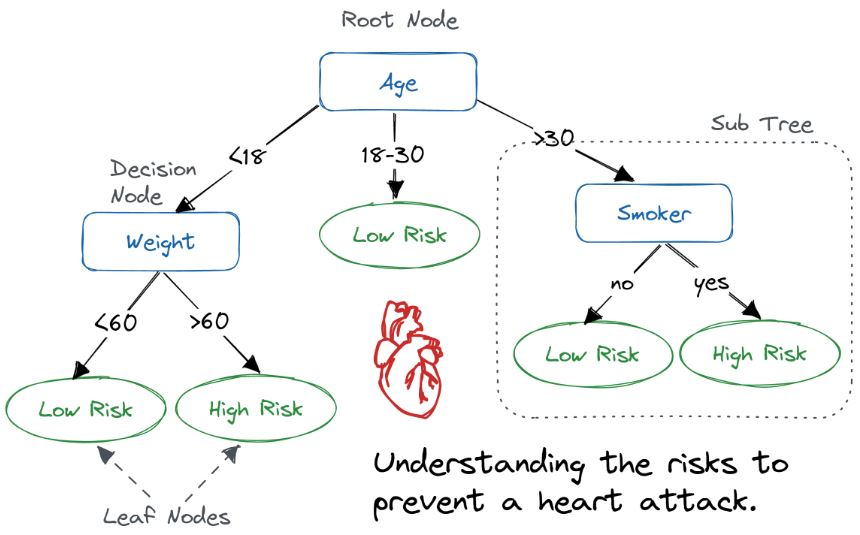

A decision tree is a **white box** type of ML algorithm. It shares internal decision-making logic, which is not available in the **black box** type of algorithms such as with a **neural network**. Its training time is faster compared to the neural network algorithm.

**Decision Tree Classifier Building**

A decision tree is a flowchart-like tree structure where an internal node represents a feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome.

The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in a recursive manner called recursive partitioning. This flowchart-like structure helps you in decision-making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.


**Importing Required Libraries**

Let's first load the required libraries.

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

**Loading Data**

This dataset is originally from the Indian Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.



In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=0, names=col_names)

In [3]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [5]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [6]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [7]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.670995670995671


In [8]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

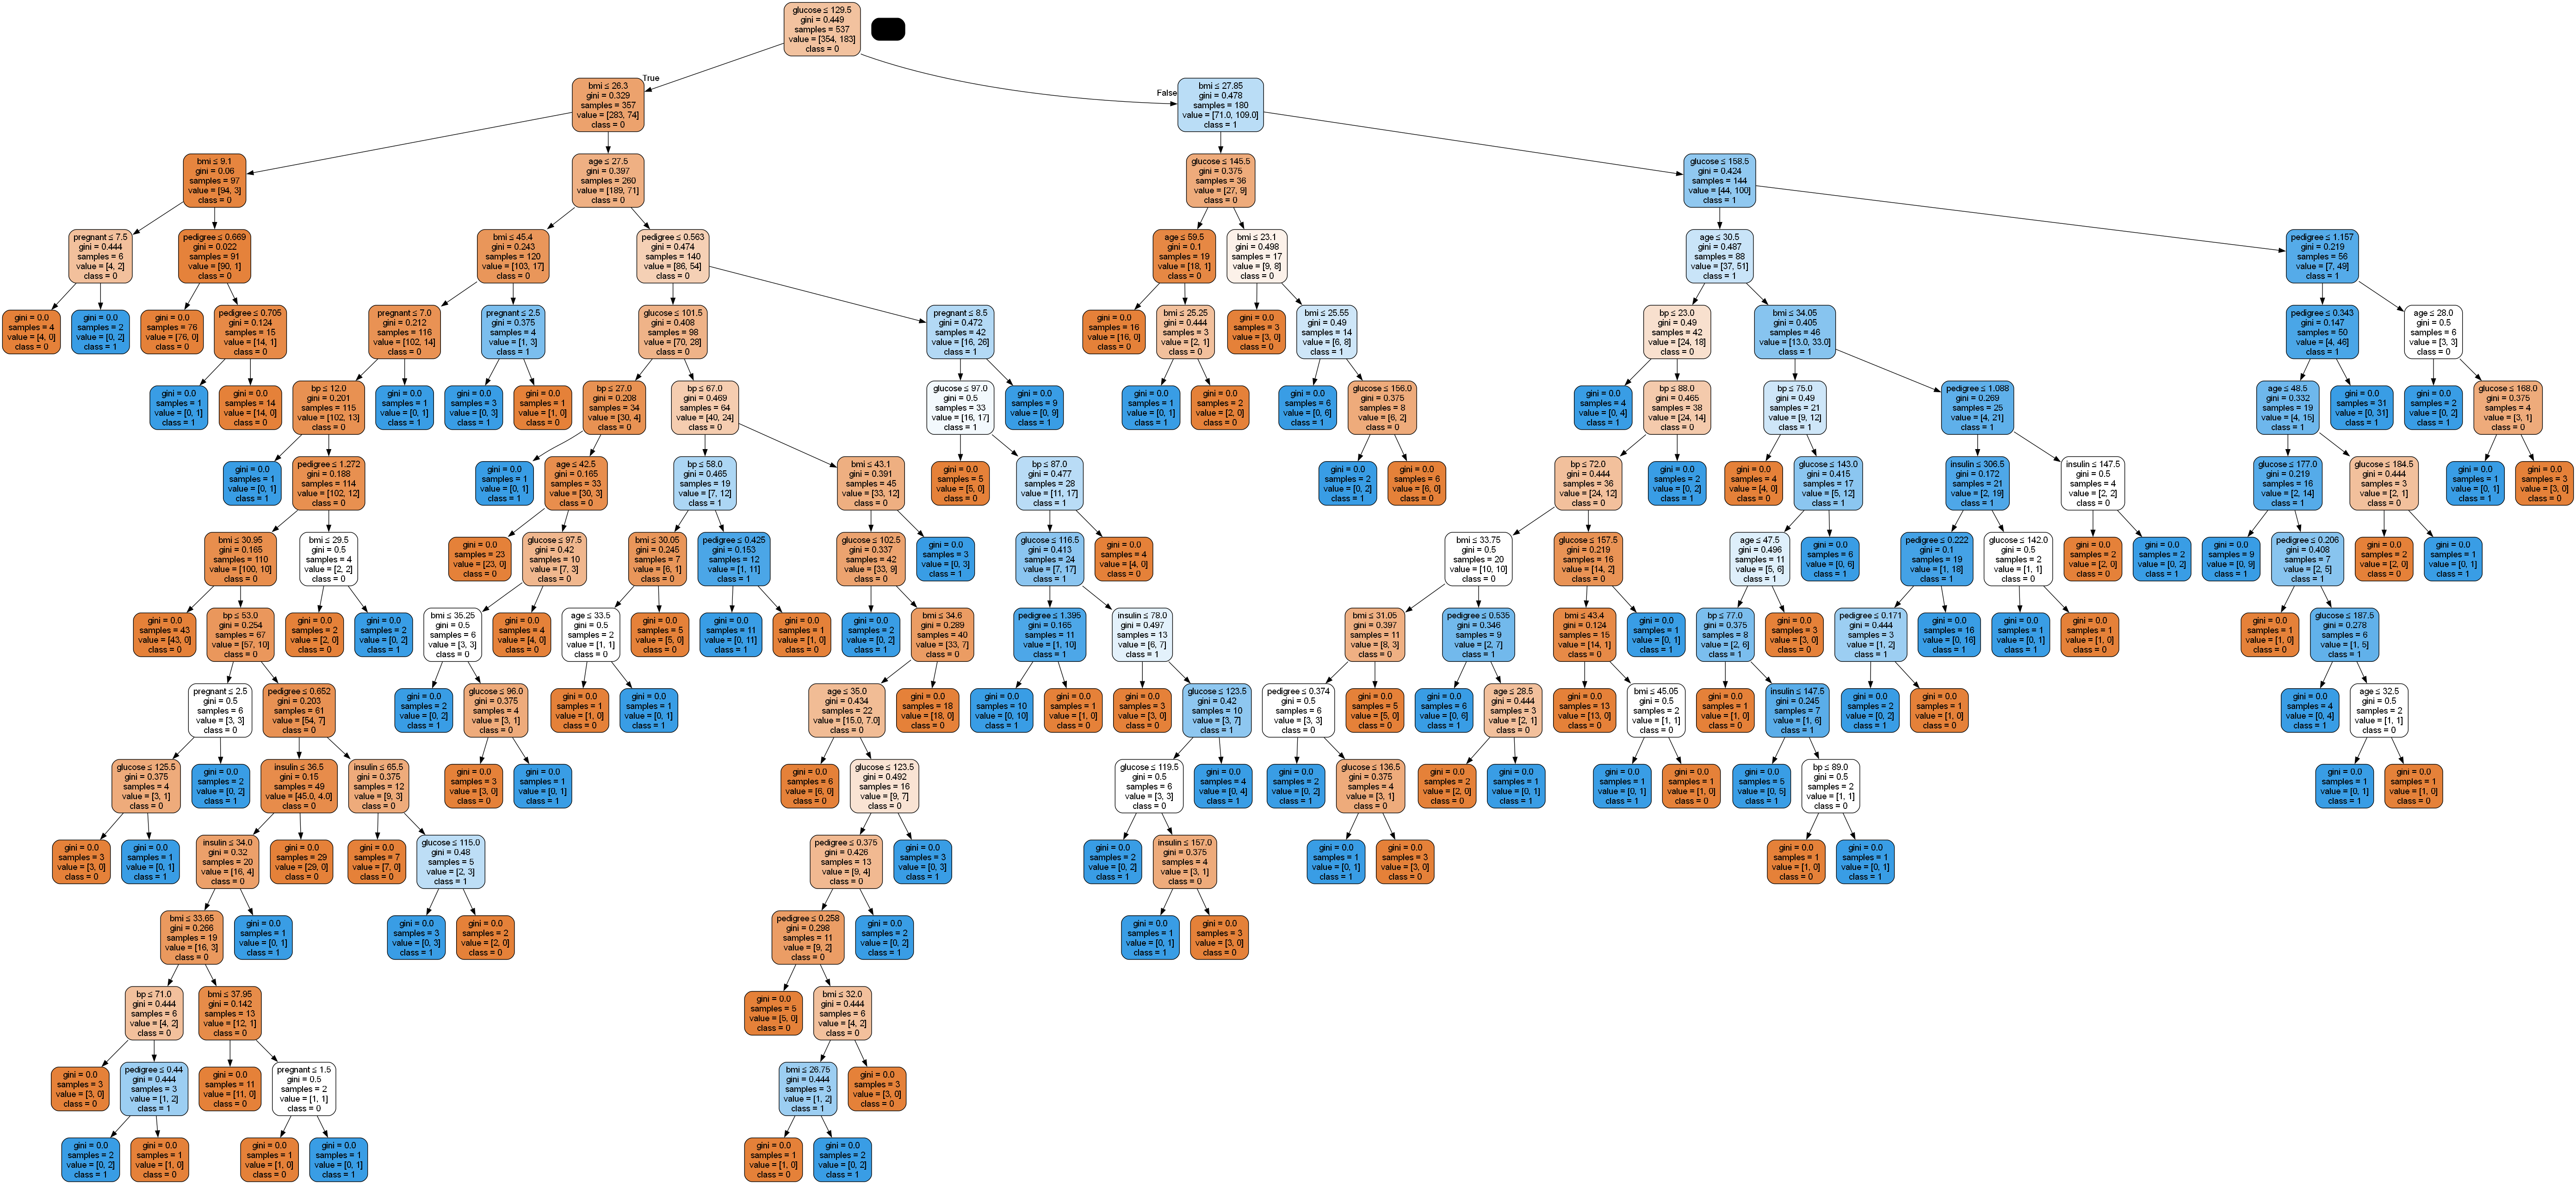

In [9]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In the decision tree chart, each internal node has a decision rule that splits the data. **Gini**, referred to as Gini ratio, measures the impurity of the node. You can say a node is **pure** when all of its records belong to the same class, such nodes known as the **leaf** node.

Here, the resultant tree is **unpruned**. This unpruned tree is unexplainable and not easy to understand. In the next section, let's optimize it by **pruning**.



**Optimizing Decision Tree Performance**

**criterion** : **optional (default=”gini”)** or Choose attribute selection measure. This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

**splitter** : **string, optional (default=”best”)** or Split Strategy. This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

**max_depth : int or None, optional (default=None)** or Maximum Depth of a Tree. The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).

In Scikit-learn, optimization of decision tree classifier performed by only **pre-pruning**. Maximum depth of the tree can be used as a control variable for pre-pruning. In the following the example, you can plot a decision tree on the same data with **max_depth=3**. Other than pre-pruning parameters, You can also try other attribute selection measure such as **entropy**.




In [17]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_true=y_test, y_pred=y_pred))

Accuracy: 0.7705627705627706


Well, the classification rate increased to **77.05%**, which is better accuracy than the previous model.

**Visualizing Decision Trees**

Let's make our decision tree a little easier to understand using the following code:

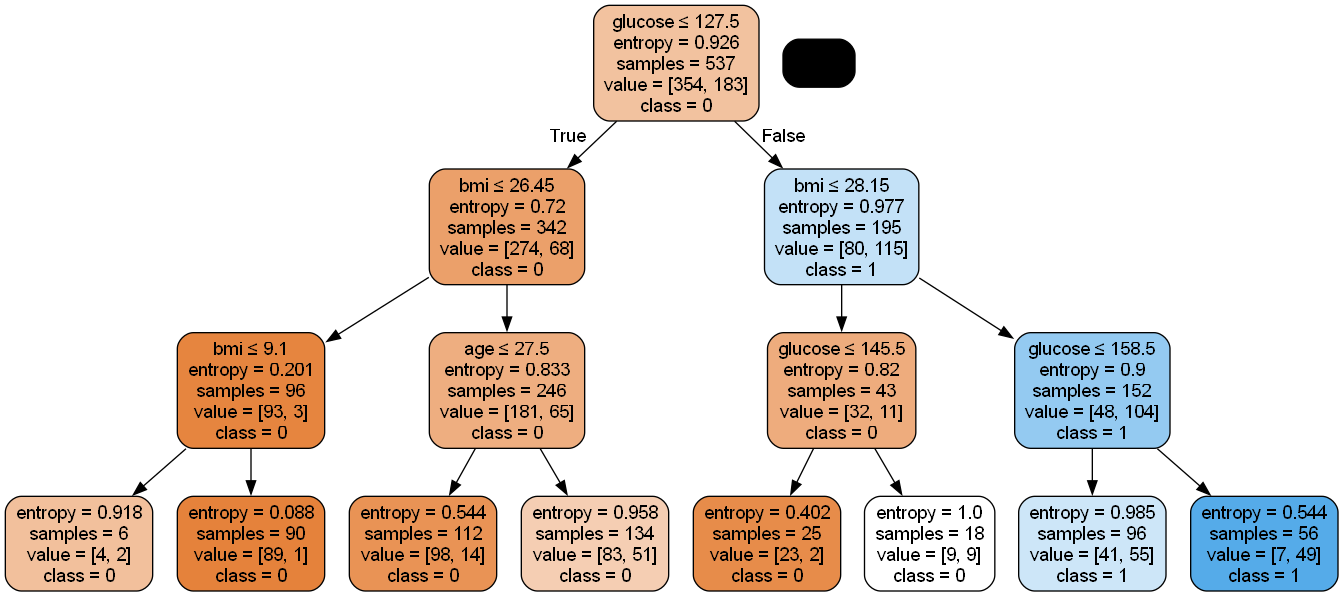

In [18]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

Here, we've completed the following steps:

Imported the required libraries.
Created a StringIO object called dot_data to hold the text representation of the decision tree.
Exported the decision tree to the dot format using the export_graphviz function and write the output to the dot_data buffer.
Created a pydotplus graph object from the dot format representation of the decision tree stored in the dot_data buffer.
Written the generated graph to a PNG file named "diabetes.png".
Displayed the generated PNG image of the decision tree using the Image object from the IPython.display module.

As you can see, this pruned model is less complex, more explainable, and easier to understand than the previous decision tree model plot.

**Conclusion**

In this lab, you covered a lot of details about decision trees; how they work, attribute selection measures such as Information Gain, Gain Ratio, and Gini Index, decision tree model building, visualization, and evaluation of a diabetes dataset using Python's Scikit-learn package. We also discussed its pros, cons, and how to optimize decision tree performance using parameter tuning.